In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
img1 = cv.imread('images/lines.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('images/watermark.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

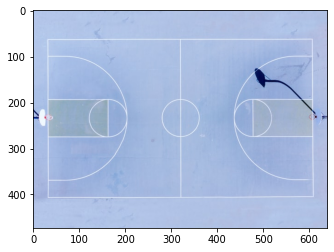

In [18]:
plt.imshow(img1)

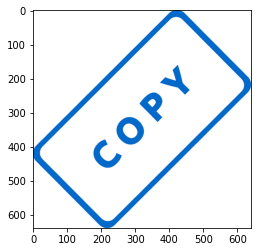

In [19]:
plt.imshow(img2)

In [20]:
img1.shape

(473, 640, 3)

In [21]:
img2.shape

(639, 640, 3)

In [22]:
# Blending images of the same size

In [24]:
img1 = cv.resize(img1, (640, 640))
img2 = cv.resize(img2, (640, 640))

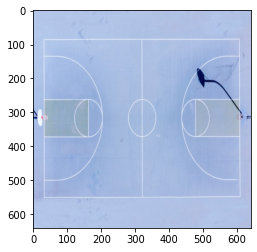

In [31]:
plt.imshow(img1)

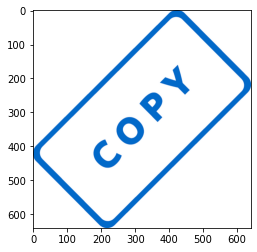

In [32]:
plt.imshow(img2)

In [69]:
blended = cv.addWeighted(src1=img1, alpha=0.9, src2=img2, beta=0.1, gamma=0)

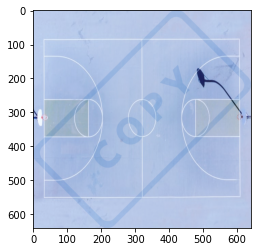

In [70]:
plt.imshow(blended)